# Welcome to Assignment 2!  
For this assignment, you will work with a clinical dataset and perform various data exploration and visualization tasks using Python. Write your code in a well-organized and readable manner. Comment your code to explain your thought process and the purpose of each step.  

### Dataset: Diabetes Patient Data  
The dataset to be used for this assignment is an adapted version of the Pima Indians Diabetes Dataset from Kaggle (`diabetes.csv`). This dataset contains information about diabetes patients.  
Features of the dataset:  
The dataset contains 768 individuals’ data with 9 features set. The detailed description of all the features are as follows:  
1. *Pregnancies*: indicates the number of pregnancies.  
2. *Glucose*: indicates the plasma glucose concentration.  
3. *Blood Pressure*: indicates diastolic blood pressure in mm/Hg.  
4. *Skin Thickness*: indicates triceps skinfold thickness in mm.  
5. *Insulin*: indicates insulin in U/mL.  
6. *BMI*: indicates the body mass index in kg/m2.  
7. *Diabetes Pedigree Function*: indicates the function which scores likelihood of diabetes based on family history.  
8. *Age*: Indicates the age of the person  
9. *Disease Presentation*: Indicates if the patient presented with diabetes or not.  


## Task 1: Reading and Initial Exploration
1. Import the necessary libraries (`pandas`, `matplotlib.pyplot`, `seaborn` etc.).
2. Read the Diabetes dataset into a pandas DataFrame.
3. Display the first 5 rows of the DataFrame to get an overview of the data.
4. Print the summary statistics of the dataset (mean, min, max, etc.).


In [4]:
#Task 1.1: Importing necessary libraries which would be required for this assignment
# Importing the pandas library as pd
import pandas as pd

# Importing the powerful numpy library as np
import numpy as np

# Importing the pyplot module from the matplotlib library as plt to make cool plots
import matplotlib.pyplot as plt

# Importing the seaborn library as sns for some stylish statistical visualizations
import seaborn as sns


In [5]:
# Task 1.2: Read the dataset 'Indians Diabetes Dataset' in a DataFrame
Indians_Diabetes_Dataset = pd.read_csv('diabetes.csv')

In [6]:
# Task 1.3: Display the first 5 rows of the dataset to get an overview
Indians_Diabetes_Dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiseasePresentation
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,yes
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,no
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,yes
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,no
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,yes


In [7]:
# Task 1.4: Print summary statistics of the dataset
print("\nSummary Statistics:")
print(Indians_Diabetes_Dataset.describe())


Summary Statistics:
       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  763.000000     733.000000     541.000000  394.000000   
mean      3.845052  121.686763      72.405184      29.153420  155.548223   
std       3.369578   30.535641      12.382158      10.476982  118.775855   
min       0.000000   44.000000      24.000000       7.000000   14.000000   
25%       1.000000   99.000000      64.000000      22.000000   76.250000   
50%       3.000000  117.000000      72.000000      29.000000  125.000000   
75%       6.000000  141.000000      80.000000      36.000000  190.000000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age  
count  757.000000                768.000000  768.000000  
mean    32.457464                  0.471876   33.240885  
std      6.924988                  0.331329   11.760232  
min     18.200000                  0.078000   21.000000  
25% 

## Task 2: Data Cleaning and Preprocessing
1. Check for missing values in the dataset and handle them appropriately (e.g., fill with mean/median or drop columns/rows).  
2. Create a new column called “Outcome” by converting the “Disease Presentation” column into a one-hot encoding. Mapping 0 to ‘no’ and 1 to ‘yes’ without using any special libraries!


In [8]:
# Task 2.1: Check for missing values using 'isnull' and get the count of missing values in each column
missing_values = Indians_Diabetes_Dataset.isnull().sum()
print("Missing Values:\n", missing_values)

# Task 2.2: Drop rows with missing values directly in the existing DataFrame
Indians_Diabetes_Dataset.dropna(inplace=True)

# Display the updated DataFrame
Indians_Diabetes_Dataset.head()

Missing Values:
 Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
DiseasePresentation           0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,DiseasePresentation
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,no
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,yes
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,yes
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,yes
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,yes


In [9]:
# Task 2.2:Convert 'Disease Presentation' to a numerical column 'Outcome', 'no' represents 0 and 'yes' represents 1
Indians_Diabetes_Dataset['Outcome'] = Indians_Diabetes_Dataset['DiseasePresentation'].map({'no': 0, 'yes': 1})

# Drop the original 'Disease Presentation' column directly in the existing DataFrame
Indians_Diabetes_Dataset.drop(columns=['DiseasePresentation'], inplace=True)

# Display the updated DataFrame
Indians_Diabetes_Dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1
6,3,78.0,50.0,32.0,88.0,31.0,0.248,26,1
8,2,197.0,70.0,45.0,543.0,30.5,0.158,53,1
13,1,189.0,60.0,23.0,846.0,30.1,0.398,59,1


## Task 3: Exploratory Data Analysis  
1. Create a histogram to visualize the distribution of patients' ages.  
2. Generate a bar plot to show the count of patients that presented with diabetes vs those that did not.  
3. Calculate and create a heatmap showing the correlation matrix between `DiabetesPedigreeFunction` and `BloodPressure`.


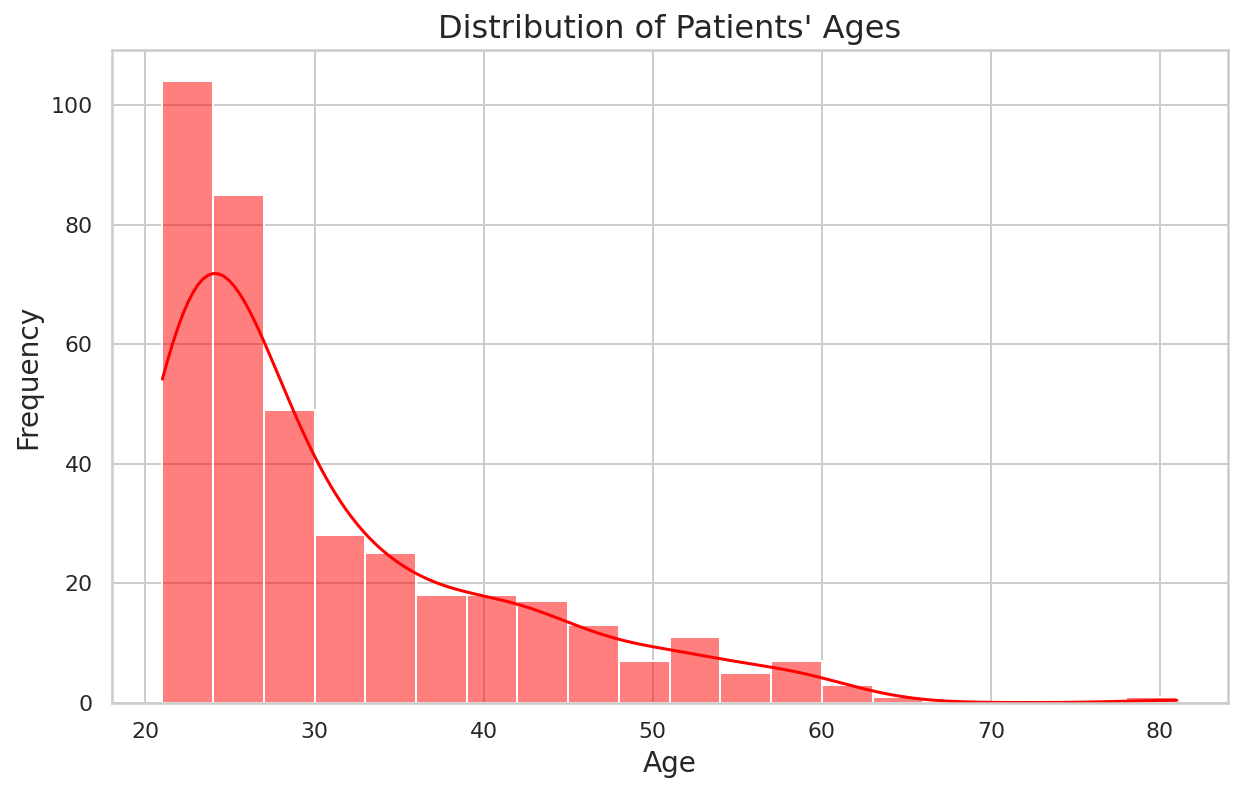

In [10]:
# Task 3.1: Create a histogram to visualize the distribution of patients' ages

# Setting the style for the plot to a white grid background, making it visually appealing.
sns.set(style="whitegrid")

# Creating the histogram by setting the figure size to 10 inches in width and 6 inches in height.
plt.figure(figsize=(10, 6))

# Use Seaborn to create a histogram of the 'Age' column from the dataset.
sns.histplot(x='Age', data=Indians_Diabetes_Dataset, bins=20, kde=True, color='red')

# Adding title and labels
plt.title('Distribution of Patients\' Ages', fontsize=16)
plt.xlabel('Age', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Displaying the plot
plt.show()

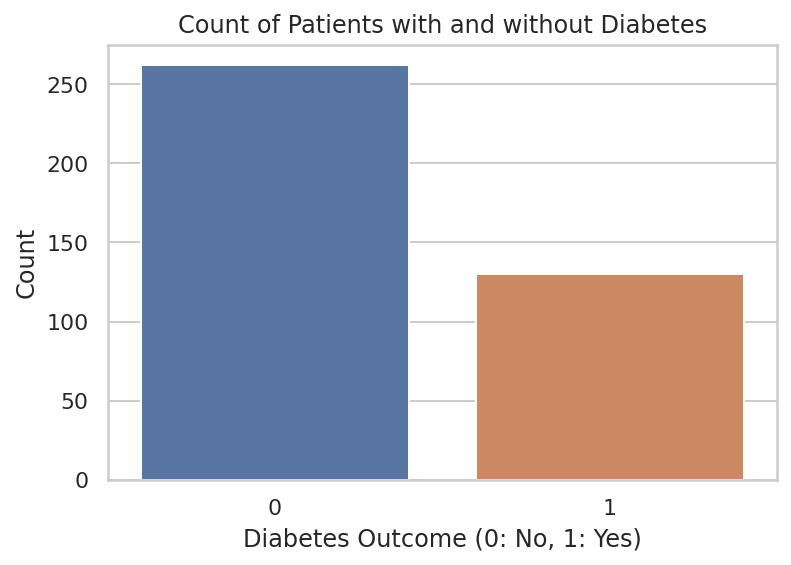

In [11]:
# Task 3.2: Generate a bar plot for the count of patients with and without diabetes

# Set the figure size
plt.figure(figsize=(6, 4))

# Create a count plot using Seaborn
sns.countplot(x='Outcome', data=Indians_Diabetes_Dataset)

# Add title and labels to the plot
plt.title('Count of Patients with and without Diabetes')
plt.xlabel('Diabetes Outcome (0: No, 1: Yes)')
plt.ylabel('Count')

# Display the plot
plt.show()

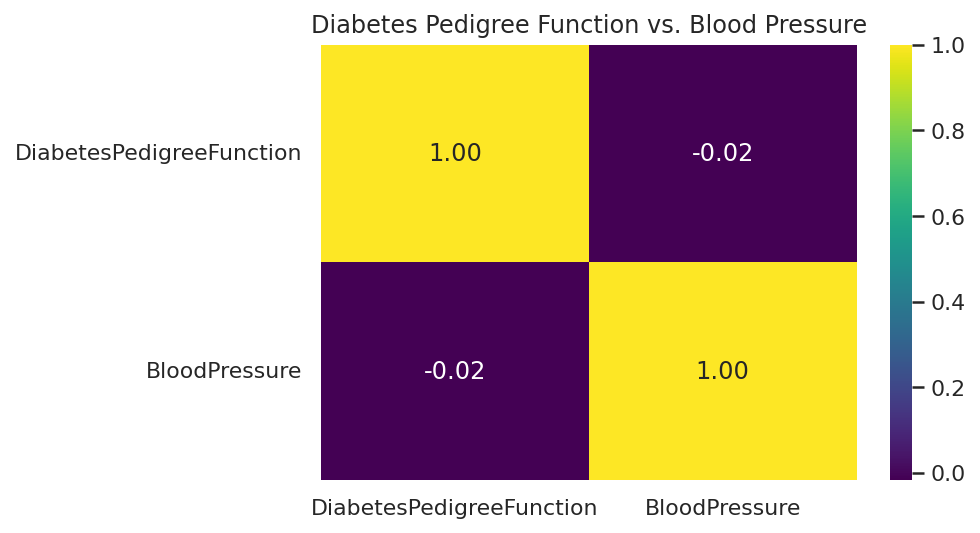

In [12]:
# Task 3.3: Create a heatmap for the correlation matrix between DiabetesPedigreeFunction and BloodPressure

# Selecting the relevant columns
selected_columns = ['DiabetesPedigreeFunction', 'BloodPressure']

# Calculating the correlation matrix
correlation_matrix_subset = Indians_Diabetes_Dataset[selected_columns].corr()

# Setting the figure size
plt.figure(figsize=(6, 4))

# Generates a heatmap using Seaborn, select color map as 'viridis' for correlation visualization, and formats annotations to two decimal places.
sns.heatmap(correlation_matrix_subset, annot=True, cmap='viridis', fmt=".2f")

# Adding title
plt.title('Diabetes Pedigree Function vs. Blood Pressure')

# Displaying the plot
plt.show()


## Task 4: Data Visualization

1. Create a scatter plot to visualize the relationship between Glucose and Insulin level.  
2. Generate a box plot to identify potential outliers in the `BMI` column.  
3. Create ranges for the ages of patients e.g., 20 – 30, 30 – 40, etc. in a new column called `AgeRange`. Create a boxplot of `AgeRange` vs `BloodPressure` stratified by `DiseasePresentation`. (Hint: You might want to use seaborn for this!)



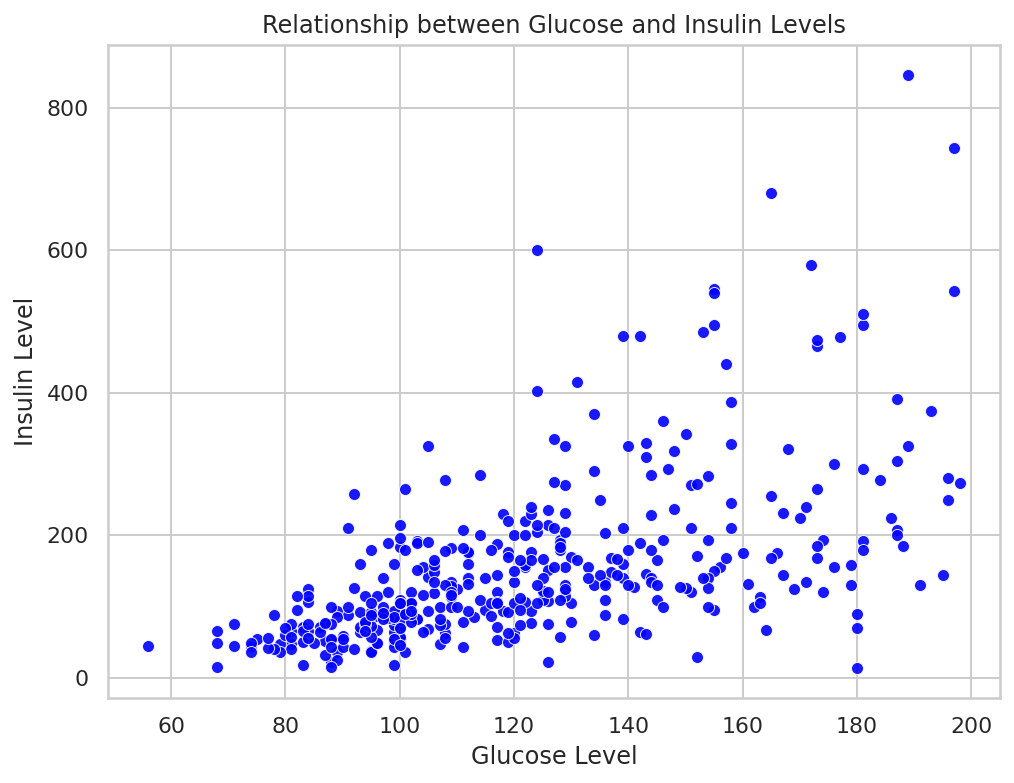

In [13]:
# Task 4.1: Create a scatter plot to visualize the relationship between Glucose and Insulin levels

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a scatter plot
sns.scatterplot(x='Glucose', y='Insulin', data=Indians_Diabetes_Dataset, color='blue', alpha=0.9)

# Adding title and labels
plt.title('Relationship between Glucose and Insulin Levels')
plt.xlabel('Glucose Level')
plt.ylabel('Insulin Level')

# Displaying the plot
plt.show()


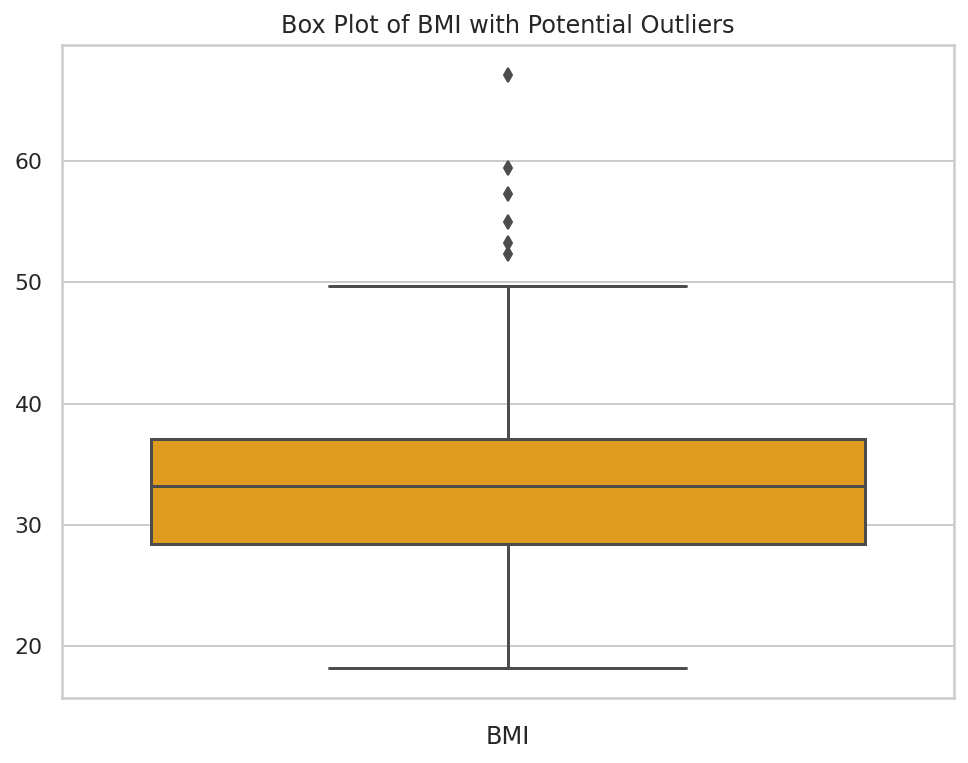

In [14]:
# Task 4.2: Generate a vertical box plot to identify potential outliers in the BMI column

# Setting the figure size
plt.figure(figsize=(8, 6))

# Creating a box plot for BMI with explicit identification of potential outliers
sns.boxplot(y=Indians_Diabetes_Dataset['BMI'], color='orange', showfliers=True)

# Adding title and labels
plt.title('Box Plot of BMI with Potential Outliers')
plt.xlabel('BMI')
plt.ylabel('')

# Displaying the plot
plt.show()

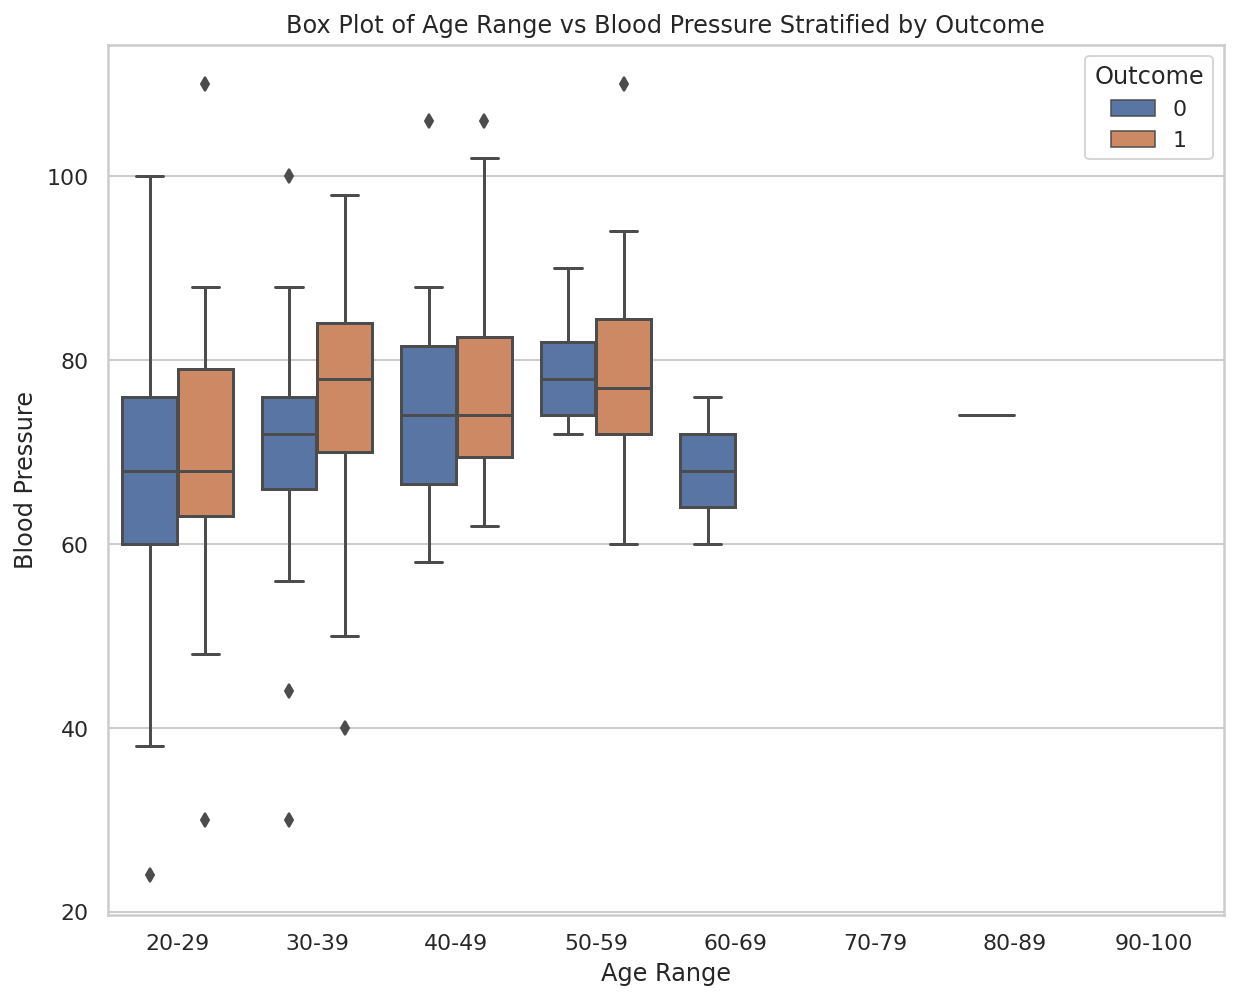

In [16]:
# Task 4.3: Create ranges for the ages of patients and generate a boxplot of AgeRange vs BloodPressure stratified by DiseasePresentation

# Define age ranges
age_bins = [20, 30, 40, 50, 60, 70, 80, 90, 100]
age_labels = ['20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89', '90-100']

# Create a new column 'AgeRange' in existing dataset by binning the 'Age' column into the specified age ranges.
Indians_Diabetes_Dataset['AgeRange'] = pd.cut(Indians_Diabetes_Dataset['Age'], bins=age_bins, labels=age_labels)

# Setting the figure size
plt.figure(figsize=(10, 8))

# Creating a box plot of Age Range vs Blood Pressure stratified by Outcome
sns.boxplot(x='AgeRange', y='BloodPressure', hue='Outcome', data=Indians_Diabetes_Dataset)

# Adding title and labels
plt.title('Box Plot of Age Range vs Blood Pressure Stratified by Outcome')
plt.xlabel('Age Range')
plt.ylabel('Blood Pressure')

# Displaying the plot
plt.show()

# I observed a trend where individuals with the disease tend to have higher blood pressure, and this trend seems to increase with age. This suggests a potential correlation between age, blood pressure, and the presence of the disease.